<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
#from js import fetch
#import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp = await fetch(URL)
#dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
#df=pd.read_csv(dataset_part_2_csv)
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


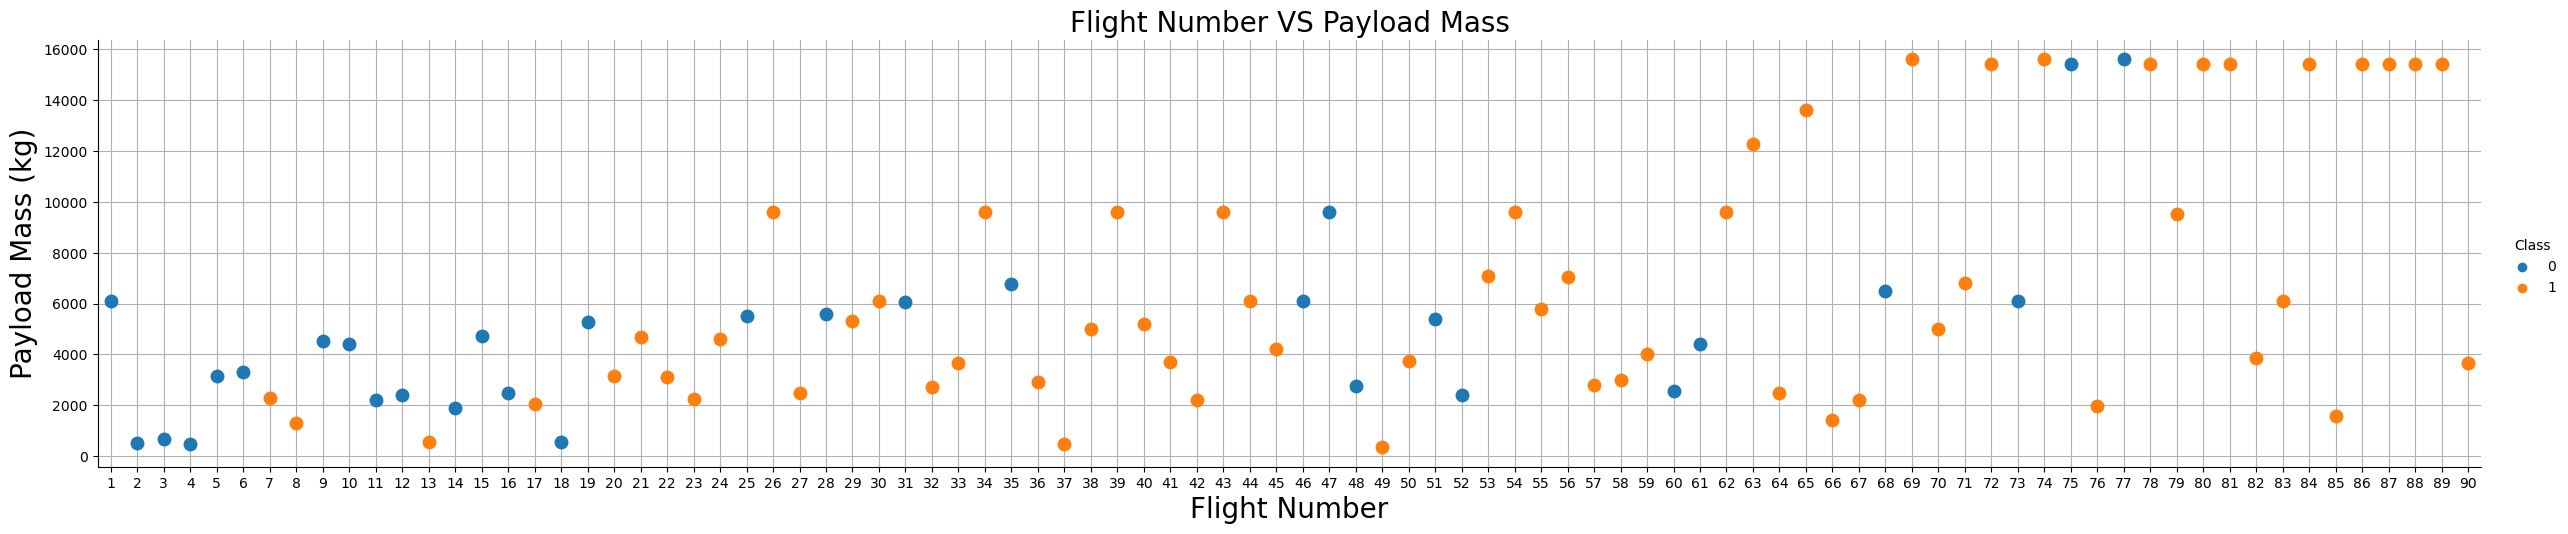

In [4]:
cat_fig=sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df,s=100, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass (kg)",fontsize=20)
plt.grid()
plt.title('Flight Number VS Payload Mass',fontsize=20)
cat_fig.savefig("FlightNumber_vs_Payload.png")

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


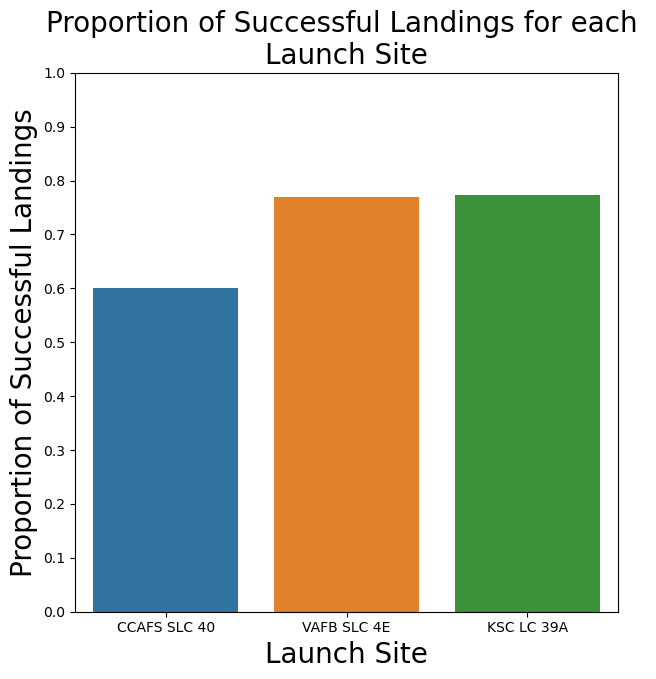

In [5]:
plt.figure(figsize=[7,7])
orbit_group=df.groupby(by='LaunchSite')['Class'].mean().to_frame()
orbit_group.reset_index(inplace=True)
orbit_group.sort_values(by='Class',inplace=True)

sns.barplot(x='LaunchSite',y='Class',data=orbit_group)

plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Proportion of Successful Landings",fontsize=20)
plt.title('Proportion of Successful Landings for each \nLaunch Site',fontsize=20)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.savefig("LaunchSite_Outcomes_bar.png")

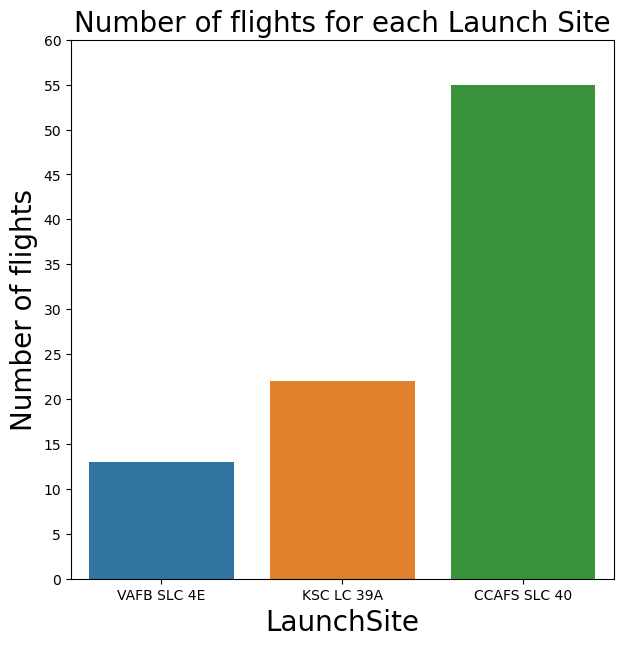

In [6]:
plt.figure(figsize=[7,7])
orbit_group=df.groupby(by='LaunchSite')['Class'].count().to_frame()
orbit_group.reset_index(inplace=True)
orbit_group.sort_values(by='Class',inplace=True)

sns.barplot(x='LaunchSite',y='Class',data=orbit_group)

plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("Number of flights",fontsize=20)
plt.title('Number of flights for each Launch Site',fontsize=20)
plt.ylim([0,60])
plt.yticks(np.arange(0,65,5))
plt.savefig("LaunchSite_flights_bar.png")

Next, let's drill down to each site visualize its detailed launch records.


## TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


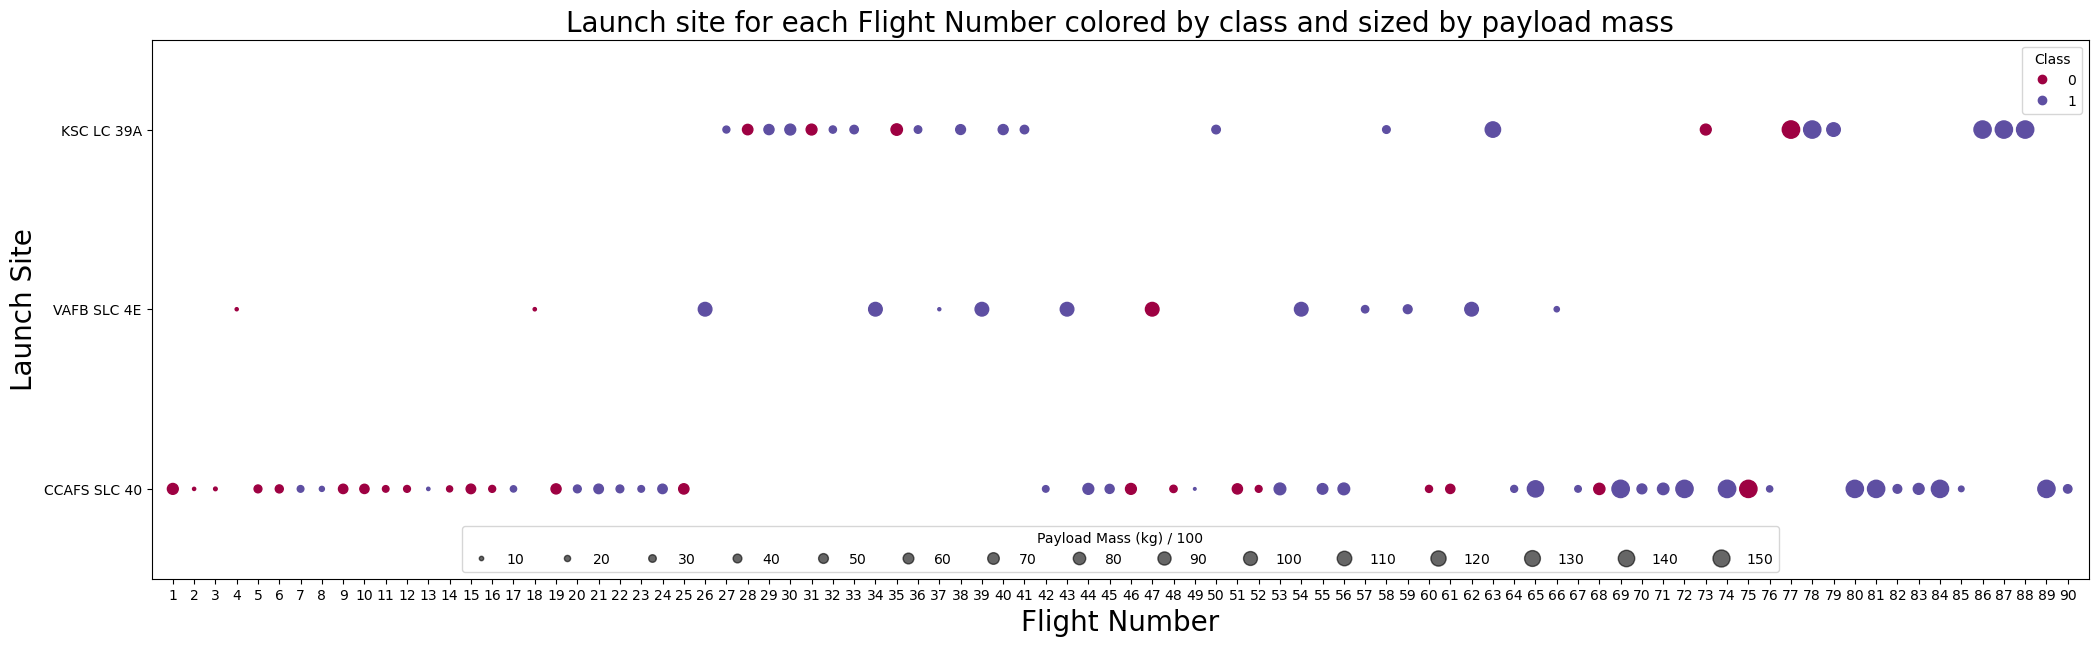

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

fig, ax = plt.subplots(figsize=[25,7])
scatter = ax.scatter(x="FlightNumber", y="LaunchSite",c="Class",data=df,s=df["PayloadMass"]/100,cmap='Spectral')
ax.set_xlabel("Flight Number",fontsize=20)
ax.set_ylabel("Launch Site",fontsize=20)
ax.set_title("Launch site for each Flight Number colored by class and sized by payload mass",fontsize=20)
ax.set_xticks(np.arange(1,91,1))
ax.set_xlim(0,91)
ax.set_ylim(-0.5,2.5)

legend1 = ax.legend(*scatter.legend_elements(), title="Class")
ax.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes",num=15, alpha=0.6)
legend2 = ax.legend(handles, labels, loc='lower center',title="Payload Mass (kg) / 100",ncol=15)

plt.savefig("FlightNumber_vs_LaunchSite2.png")

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


## TASK 2: Visualize the relationship between Payload and Launch Site

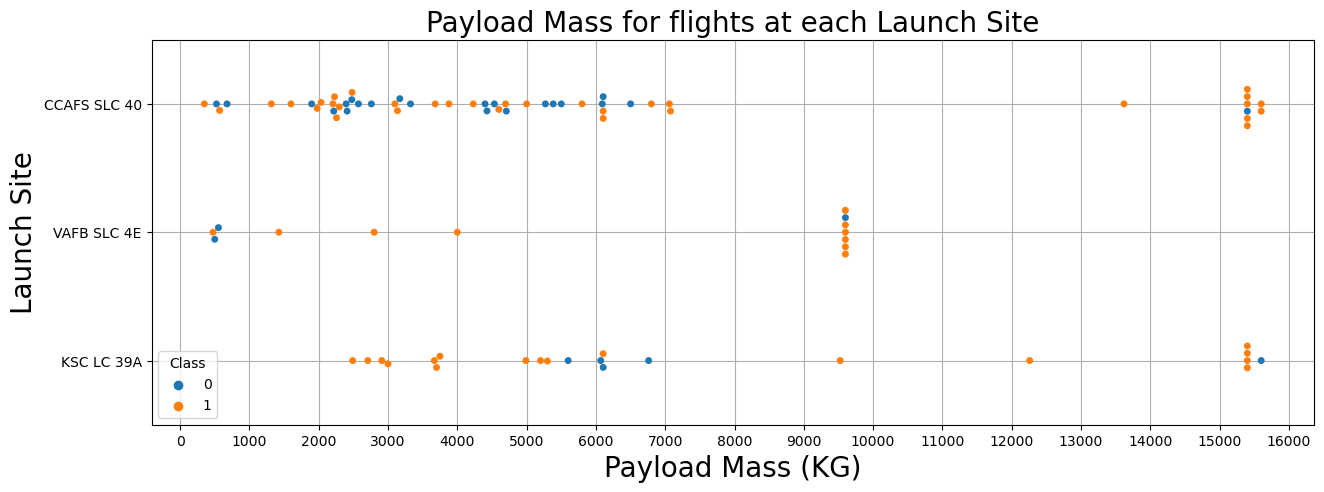

In [8]:
plt.figure(figsize=[15,5])
sns.swarmplot(x="PayloadMass", y="LaunchSite", hue="Class",data=df)
plt.xlabel("Payload Mass (KG)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.title('Payload Mass for flights at each Launch Site',fontsize=20)
plt.xticks(np.arange(0,17000,1000))
plt.grid()
plt.savefig("Payload_vs_LaunchSite.png")

We also want to observe if there is any relationship between launch sites and their payload mass.


In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


## TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


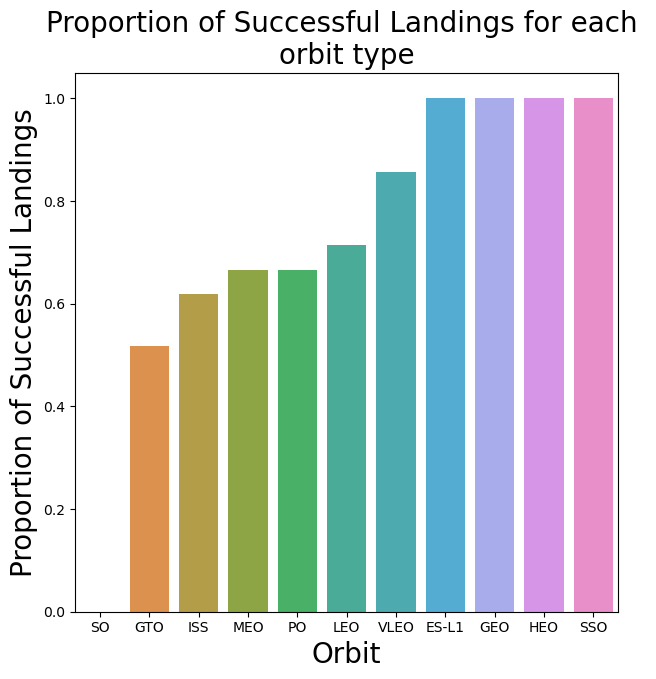

In [10]:
# HINT use groupby method on Orbit column and get the mean of Class column
plt.figure(figsize=[7,7])
orbit_group=df.groupby(by='Orbit')['Class'].mean().to_frame()
orbit_group.reset_index(inplace=True)
orbit_group.sort_values(by='Class',inplace=True)

sns.barplot(x='Orbit',y='Class',data=orbit_group)

plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Proportion of Successful Landings",fontsize=20)
plt.title('Proportion of Successful Landings for each \norbit type',fontsize=20)
plt.savefig("Orbit_Outcomes_bar.png")

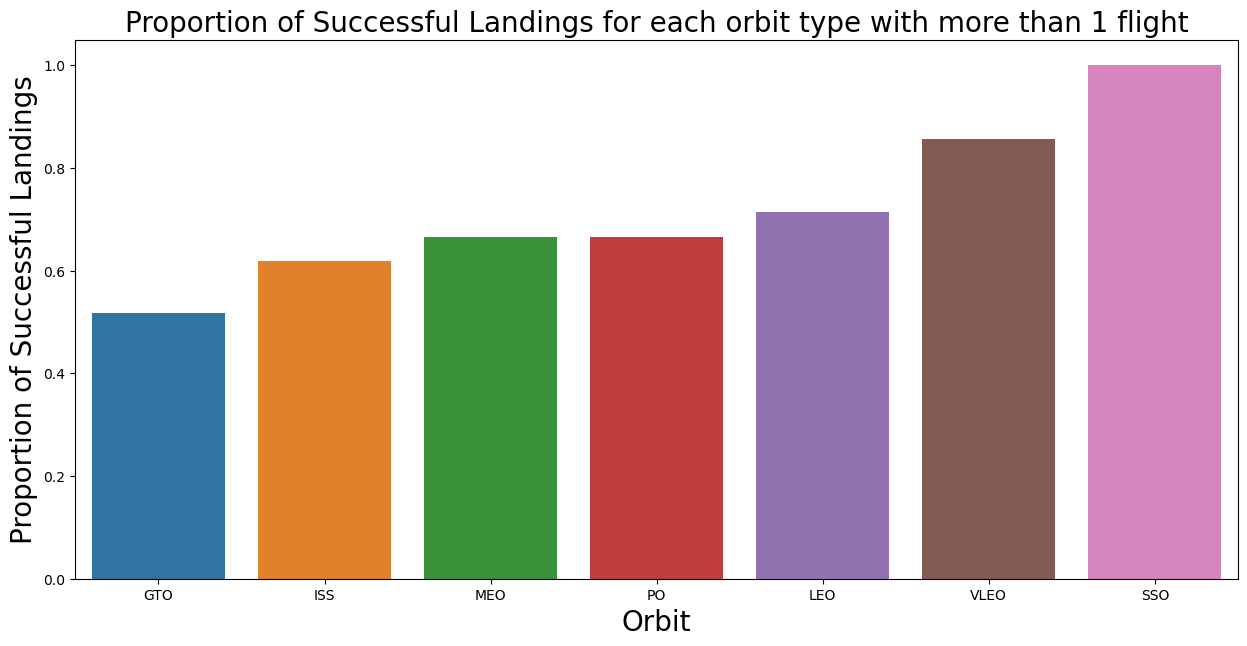

In [11]:
# HINT use groupby method on Orbit column and get the mean of Class column
plt.figure(figsize=[15,7])
orbit_group=df[~df['Orbit'].isin(['SO','ES-L1','GEO','HEO'])].groupby(by='Orbit')['Class'].mean().to_frame()
orbit_group.reset_index(inplace=True)
orbit_group.sort_values(by='Class',inplace=True)

sns.barplot(x='Orbit',y='Class',data=orbit_group)

plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Proportion of Successful Landings",fontsize=20)
plt.title('Proportion of Successful Landings for each orbit type with more than 1 flight',fontsize=20)
plt.savefig("Orbit_Outcomes_bar2.png")

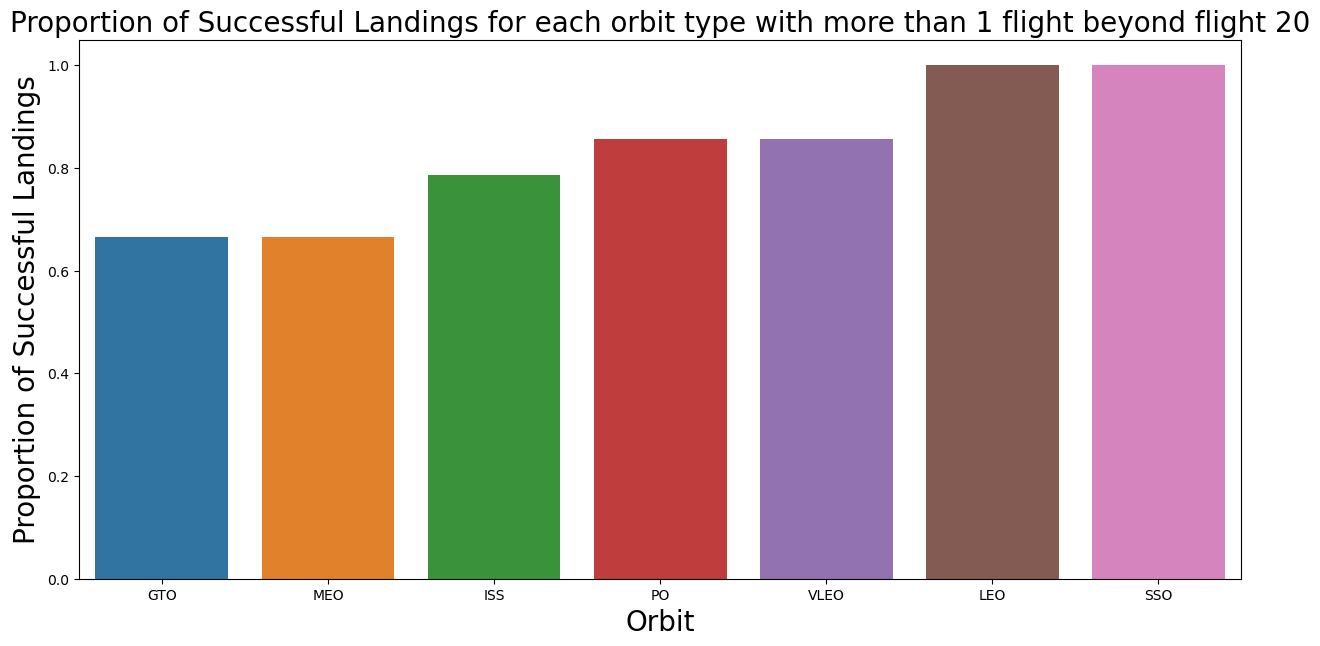

In [30]:
# HINT use groupby method on Orbit column and get the mean of Class column
plt.figure(figsize=[15,7])
orbit_group=df[(df['FlightNumber']>20)&(~df['Orbit'].isin(['SO','ES-L1','GEO','HEO']))].groupby(by='Orbit')['Class'].mean().to_frame()
orbit_group.reset_index(inplace=True)
orbit_group.sort_values(by='Class',inplace=True)

sns.barplot(x='Orbit',y='Class',data=orbit_group)

plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Proportion of Successful Landings",fontsize=20)
plt.title('Proportion of Successful Landings for each orbit type with more than 1 flight beyond flight 20',fontsize=20)
plt.savefig("Orbit_Outcomes_bar5.png")

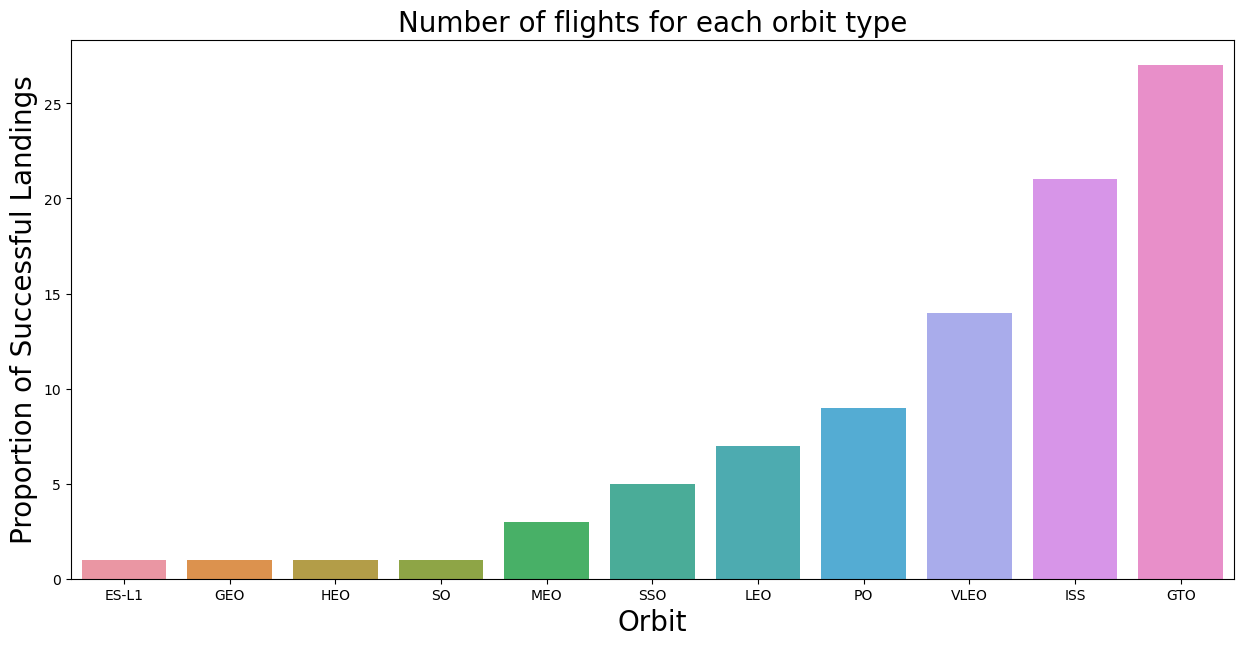

In [12]:
plt.figure(figsize=[15,7])
orbit_flights_group=df.groupby(by='Orbit')['Class'].count().to_frame()
orbit_flights_group.reset_index(inplace=True)
orbit_flights_group.sort_values(by='Class',inplace=True)

sns.barplot(x='Orbit',y='Class',data=orbit_flights_group)

plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Proportion of Successful Landings",fontsize=20)
plt.title('Number of flights for each orbit type',fontsize=20)
plt.savefig("Orbit_Outcomes_bar3.png")

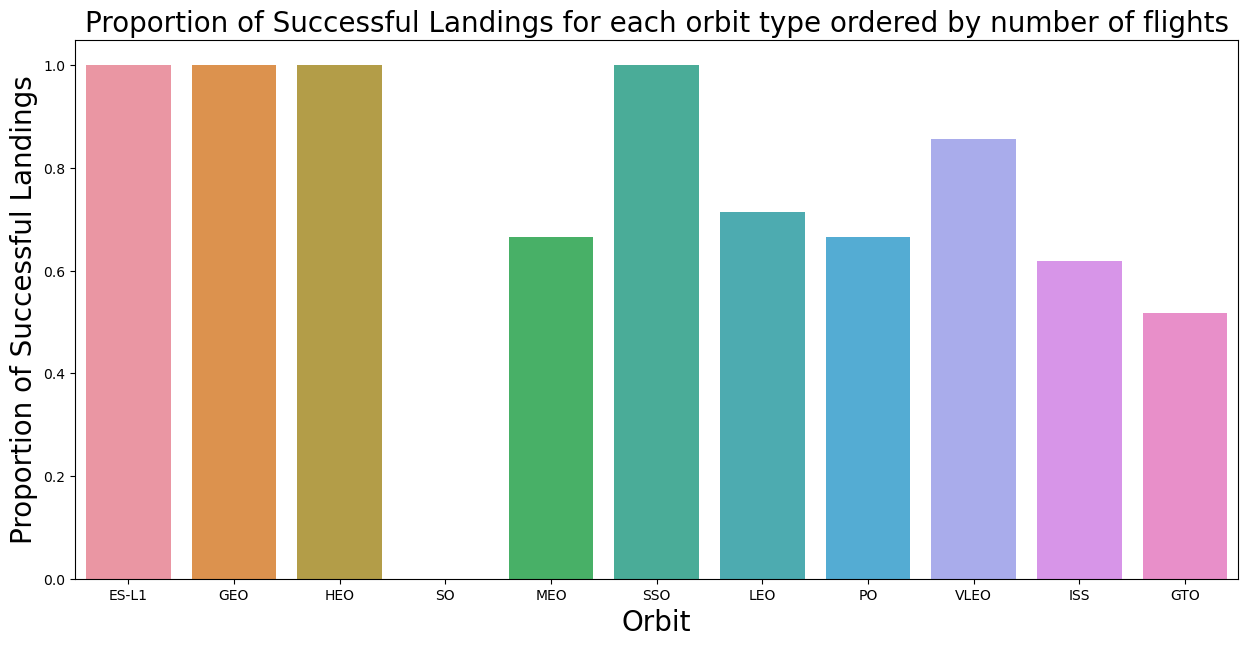

In [13]:
orbit_flights_group.reset_index(drop=True,inplace=True)
orbit_flights_group.sort_values(by='Orbit',inplace=True)

plt.figure(figsize=[15,7])
orbit_group=df.groupby(by='Orbit')['Class'].mean().to_frame()
orbit_group.reset_index(inplace=True)
orbit_group.sort_values(by='Orbit',inplace=True)
orbit_group.set_index(orbit_flights_group.index,inplace=True)
orbit_group.sort_index(inplace=True)

sns.barplot(x='Orbit',y='Class',data=orbit_group)

plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Proportion of Successful Landings",fontsize=20)
plt.title('Proportion of Successful Landings for each orbit type ordered by number of flights',fontsize=20)
plt.savefig("Orbit_Outcomes_bar4.png")

Analyze the ploted bar chart try to find which orbits have high sucess rate.


## TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


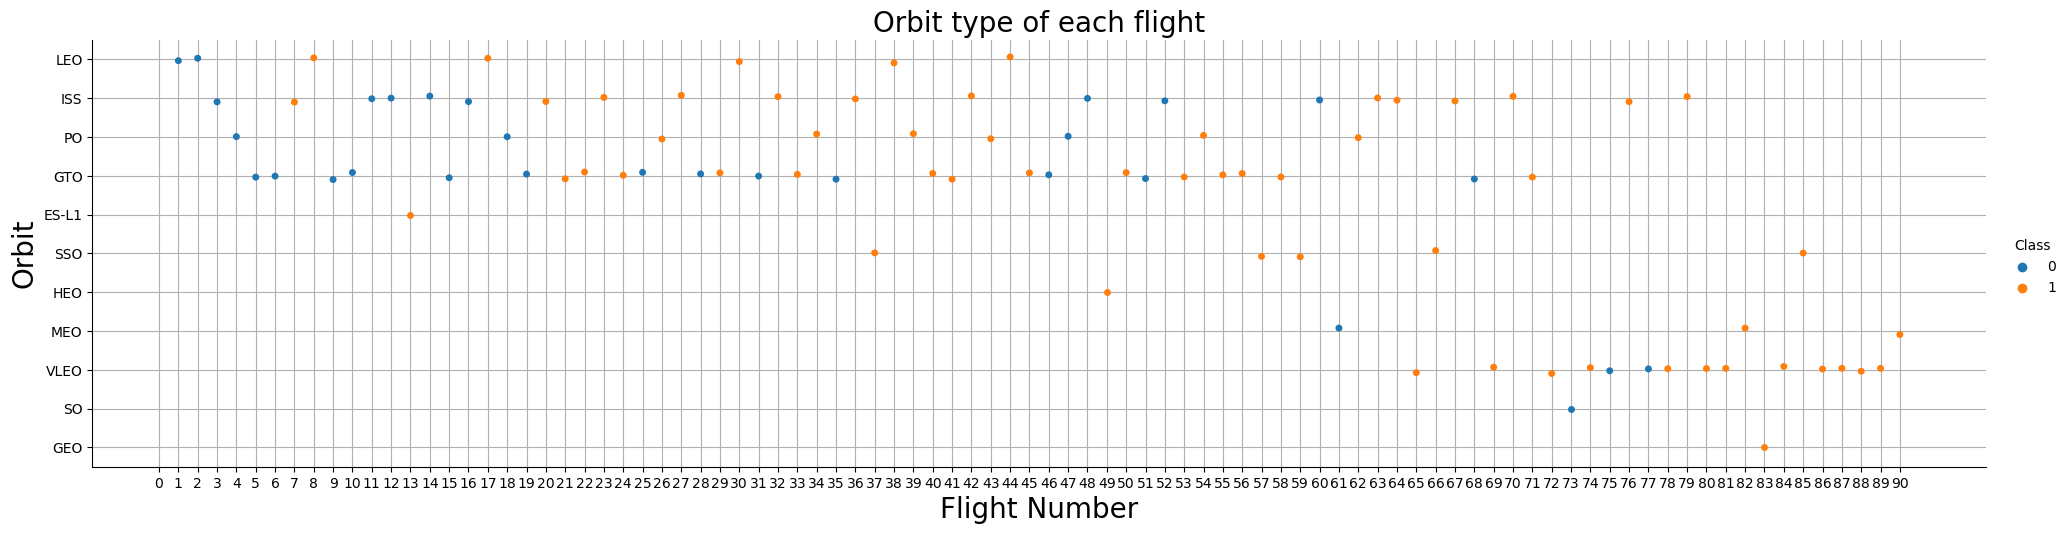

In [14]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
cat_fig=sns.catplot(x="FlightNumber", y="Orbit", hue="Class",data=df, aspect=4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title('Orbit type of each flight',fontsize=20)
plt.xticks(np.arange(0,91,1))
plt.grid()
cat_fig.savefig("FlightNumber_vs_Orbit.png")

<Figure size 2000x700 with 0 Axes>

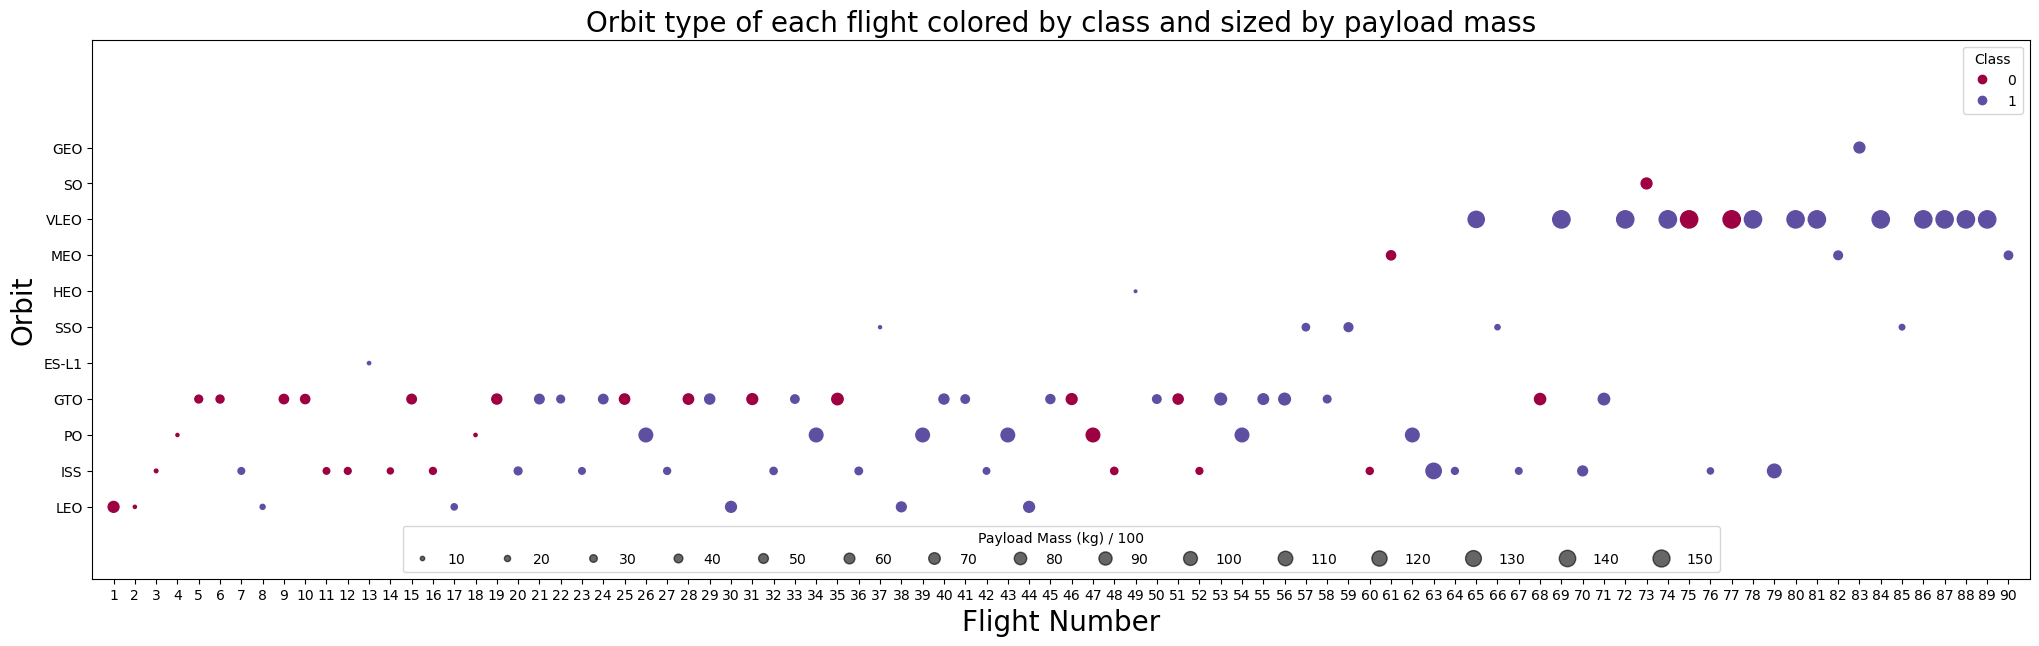

In [15]:
plt.figure(figsize=[20,7])
#sns.set_style('whitegrid',{'axes.grid' : True})
#sns.catplot(x="FlightNumber", y="Orbit", hue="PayloadMass",data=df,row='Class',kind='swarm',aspect=4,s=100,palette='coolwarm')
fig, ax = plt.subplots(figsize=[25,7])
scatter = ax.scatter(x="FlightNumber", y="Orbit",c="Class",data=df,s=df["PayloadMass"]/100,cmap='Spectral')
ax.set_xlabel("Flight Number",fontsize=20)
ax.set_ylabel("Orbit",fontsize=20)
ax.set_title("Orbit type of each flight colored by class and sized by payload mass",fontsize=20)
ax.set_xticks(np.arange(1,91,1))
ax.set_xlim(0,91)
ax.set_ylim(-2,13)

legend1 = ax.legend(*scatter.legend_elements(), title="Class")
ax.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes",num=15, alpha=0.6)
legend2 = ax.legend(handles, labels, loc='lower center',title="Payload Mass (kg) / 100",ncol=15)

plt.savefig("FlightNumber_vs_orbit2.png")

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


## TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


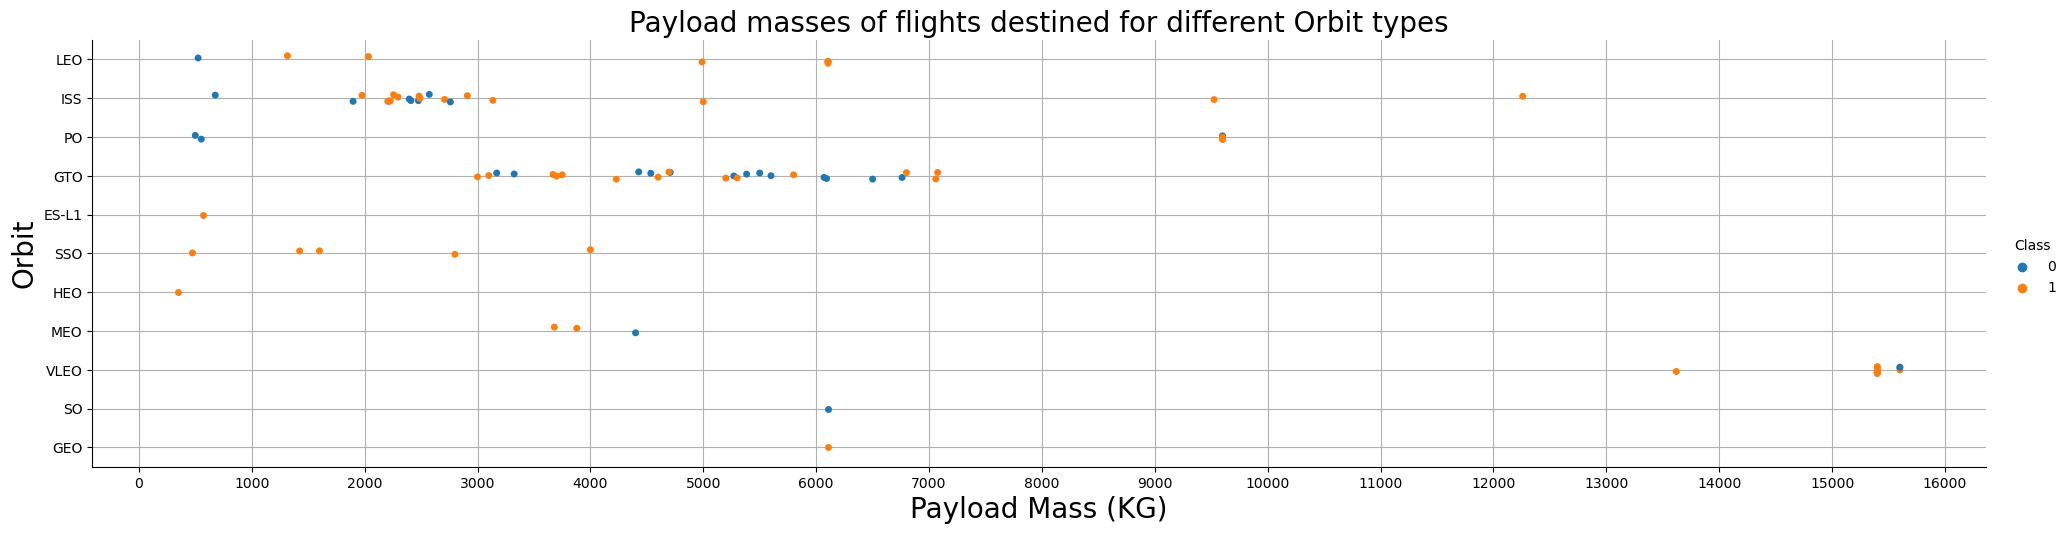

In [16]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
cat_fig=sns.catplot(x="PayloadMass", y="Orbit", hue="Class",data=df, aspect=4)
plt.xlabel("Payload Mass (KG)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title('Payload masses of flights destined for different Orbit types',fontsize=20)
plt.xticks(np.arange(0,17000,1000))
plt.grid()
cat_fig.savefig("Payload_vs_Orbit.png")


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


## TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [17]:
# A function to Extract years from the date 
year=[]
month=[]
day=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
        month.append(i.split("-")[1])
        day.append(i.split("-")[2])
    return year
Extract_year()
df['Year'] = list(map(int,year))
df['Month'] = list(map(int,month))
df['Day'] = list(map(int,day))
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year,Month,Day
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,...,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010,6,4
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,...,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012,5,22
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,...,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013,3,1
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,...,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013,9,29
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,...,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013,12,3


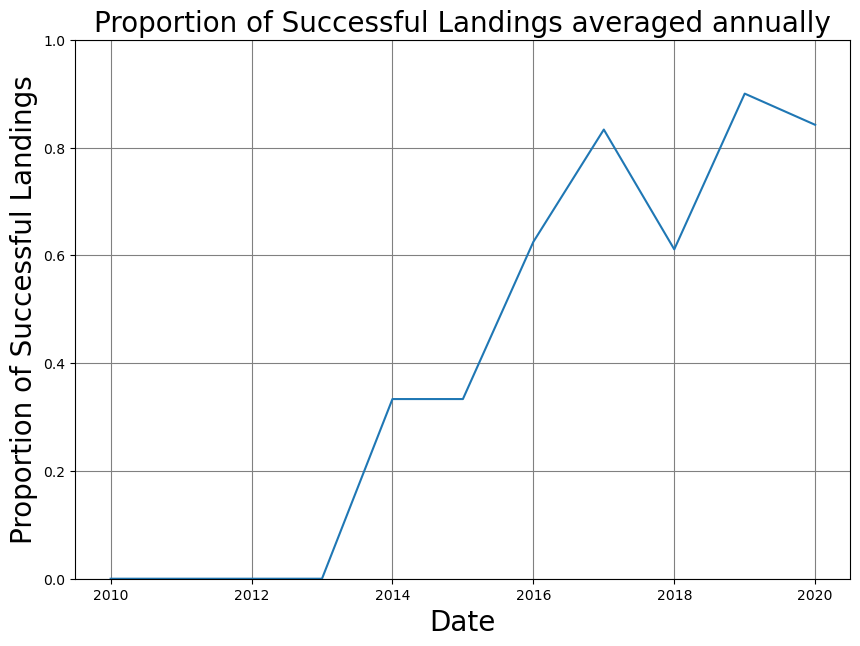

In [18]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize=[10,7])
df_date=df.groupby(by='Year')['Class'].mean().to_frame()
df_date.reset_index(inplace=True)
sns.lineplot(x='Year',y='Class',data=df_date)

plt.xlabel("Date",fontsize=20)
plt.ylabel("Proportion of Successful Landings",fontsize=20)
plt.title('Proportion of Successful Landings averaged annually',fontsize=20)
plt.ylim(0,1)
plt.grid(which='both',color='grey')
plt.savefig("Date_vs_Success.png")

you can observe that the sucess rate since 2013 kept increasing till 2020


In [19]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [21]:
### TASK  7: Create dummy variables to categorical columns
features_one_hot=pd.get_dummies(data=features,columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [22]:
# HINT: Use get_dummies() function on the categorical columns

In [23]:
### TASK  8: Cast all numeric columns to `float64`
print(features_one_hot.info())
features_one_hot=features_one_hot.astype('float64')
print(features_one_hot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     bool   
 4   Reused                               90 non-null     bool   
 5   Legs                                 90 non-null     bool   
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     uint8  
 9   Orbit_GEO                            90 non-null     uint8  
 10  Orbit_GTO                            90 non-null     uint8  
 11  Orbit_HEO                         

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [25]:
df.Date=pd.to_datetime(df.Date)

In [26]:
df.to_csv("spaceX_data.csv")

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [27]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
